<h1>Spatial Filters</h1>
<h2>Question : </h2>
<p>Write a program to implement spatial domain averaging filter, weighted averaging filter, median filter of size 3X3, 5X5 and observe its blurring effect on the given noise.tiff and car.png image. Also find the optimum size of the kernel for median filter for which the features in the image ‘noise.tif’ are the clearest with minimum noise and deformation of the features. Do not use inbuilt spatial filtering function.</p>


<h3>Import necessary libraries</h3>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3>Define the filters : </h3>
<ul>
    <li>Mean Filter or Average Filter (Unweighted)</li>
    <li>Weighted Mean Filter</li>
    <li>Median Filter</li>
</ul>

In [7]:
# Function to apply averaging filter 
def average_filter(image, kernel_size):
    pad = kernel_size // 2  # Padding size
    padded_img = np.pad(image, pad, mode="constant", constant_values=0)  # Zero padding
    filtered_img = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+kernel_size, j:j+kernel_size]
            filtered_img[i, j] = np.mean(region)

    return filtered_img.astype(np.uint8)

# Function to apply weighted averaging filter 
def weighted_average_filter(image, kernel_size=3):
    pad = kernel_size // 2
    padded_img = np.pad(image, pad, mode="constant", constant_values=0)
    filtered_img = np.zeros_like(image)

    # Create a weighted kernel where the center has the highest weight
    kernel = np.fromfunction(
        lambda x, y: (kernel_size - abs(x - pad) - abs(y - pad)), 
        (kernel_size, kernel_size)
    )
    kernel /= kernel.sum()  # Normalize so the sum of the kernel is 1

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+kernel_size, j:j+kernel_size]
            filtered_img[i, j] = np.sum(region * kernel)

    # Clip values to stay within valid range (0-255 for uint8 images)
    filtered_img = np.clip(filtered_img, 0, 255)

    return filtered_img.astype(np.uint8)


# Function to apply median filter 
def median_filter(image, kernel_size):
    pad = kernel_size // 2
    padded_img = np.pad(image, pad, mode="constant", constant_values=0)
    filtered_img = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+kernel_size, j:j+kernel_size]
            filtered_img[i, j] = np.median(region)

    return filtered_img.astype(np.uint8)


<h3>Load the images and apply the filters</h3>

In [8]:
# Load images (convert to grayscale for processing)
noise_img = cv2.imread("noise.tif", cv2.IMREAD_GRAYSCALE)
car_img = cv2.imread("car.png", cv2.IMREAD_GRAYSCALE)

# Ensure images are loaded
if noise_img is None or car_img is None:
    print("Error: One or both images not found! Check file paths.")
    exit()

# Define kernel sizes (3*3 and 5*5)
kernel_sizes = [3, 5]

# Store results
filtered_images = {}

for size in kernel_sizes:
    filtered_images[f"Noise_Avg_{size}"] = average_filter(noise_img, size)
    filtered_images[f"Car_Avg_{size}"] = average_filter(car_img, size)

    filtered_images[f"Noise_Weighted_{size}"] = weighted_average_filter(noise_img, size)
    filtered_images[f"Car_Weighted_{size}"] = weighted_average_filter(car_img, size)

    filtered_images[f"Noise_Median_{size}"] = median_filter(noise_img, size)
    filtered_images[f"Car_Median_{size}"] = median_filter(car_img, size)

# Test different kernel sizes for optimal median filtering of noise.tiff
optimal_kernel_sizes = [3, 5, 7, 9]  # Try larger sizes to find the best
optimal_median_results = [median_filter(noise_img, k) for k in optimal_kernel_sizes]


<h3>Plot the images</h3>

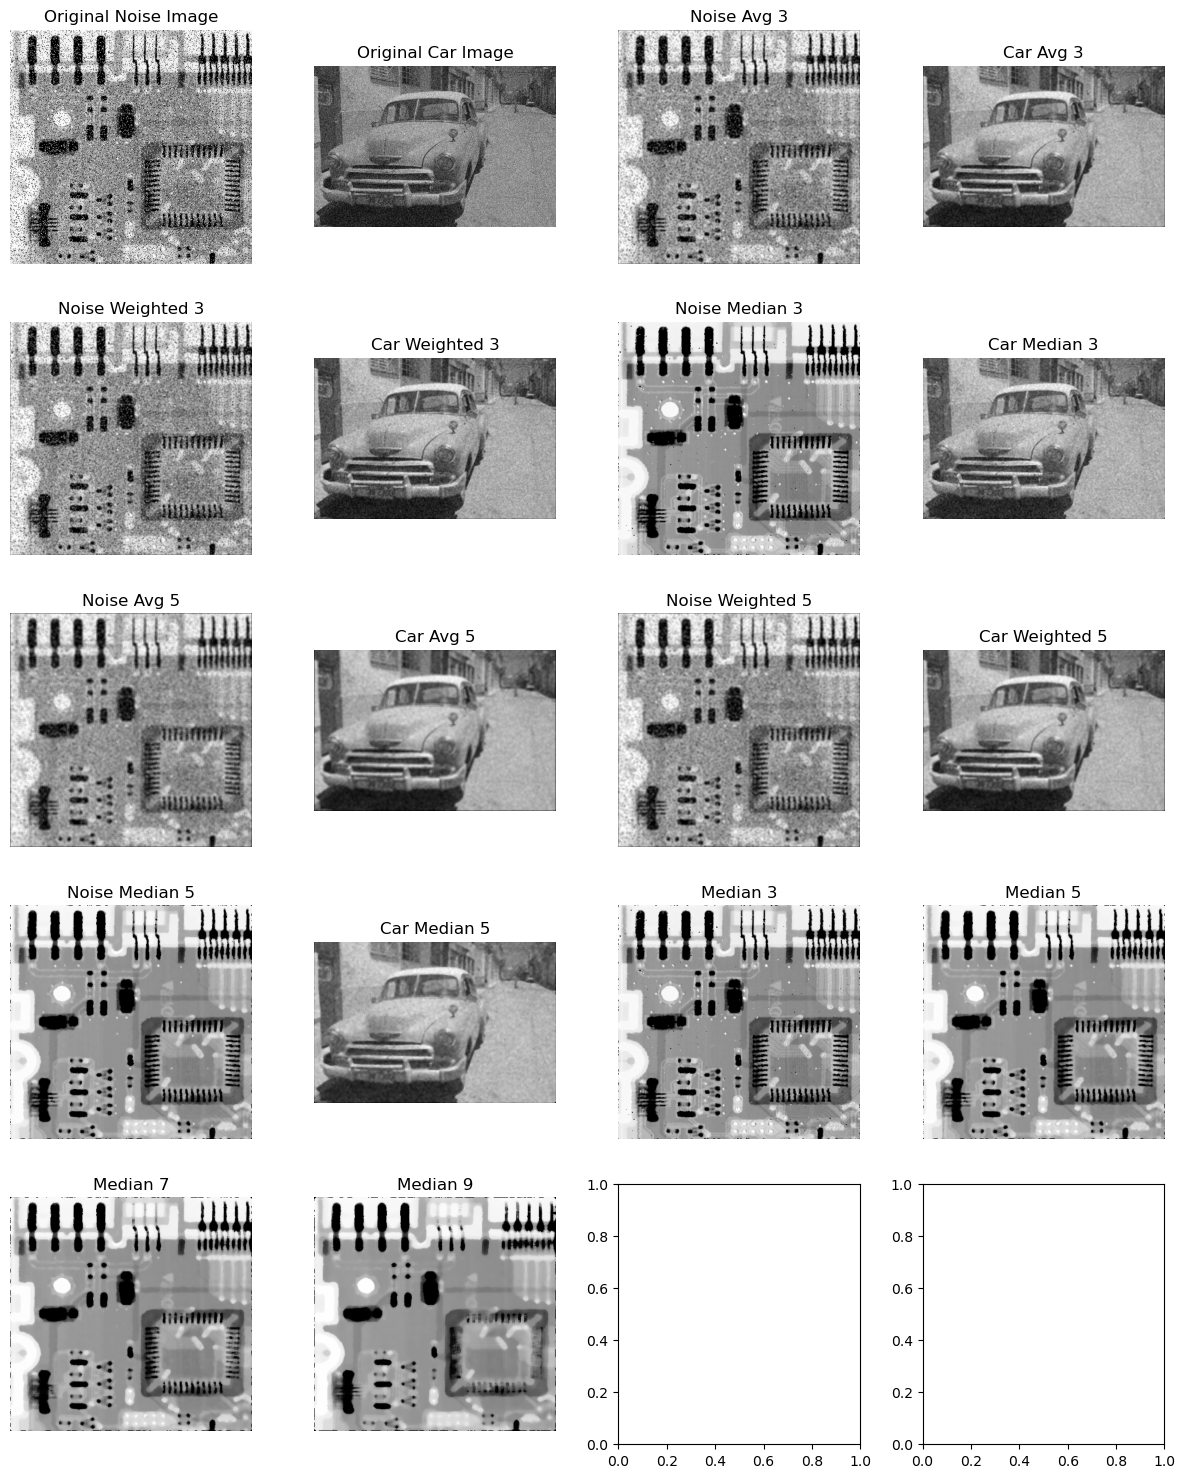

In [9]:
# Display results
fig, axes = plt.subplots(5, 4, figsize=(12, 15))
axes = axes.ravel()

# Show original images
axes[0].imshow(noise_img, cmap="gray")
axes[0].set_title("Original Noise Image")
axes[0].axis("off")

axes[1].imshow(car_img, cmap="gray")
axes[1].set_title("Original Car Image")
axes[1].axis("off")

# Show filtered images
i = 2
for key, img in filtered_images.items():
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(key.replace("_", " "))
    axes[i].axis("off")
    i += 1

# Show different median filter sizes on noise.tiff
for j in range(len(optimal_kernel_sizes)):
    axes[i].imshow(optimal_median_results[j], cmap="gray")
    axes[i].set_title(f"Median {optimal_kernel_sizes[j]}")
    axes[i].axis("off")
    i += 1

plt.tight_layout()
plt.show()


<h3>Conclusion : </h3>
<ul>
    <li>In weighted and unweighted average filters, as the kernel size increases ,the blurring increases.</li>
    <li>Unweighted average filter leads to stringer blurring effect.</li>
    <li>Median filter of kernel size 3 seems to be the best</li>
</ul>

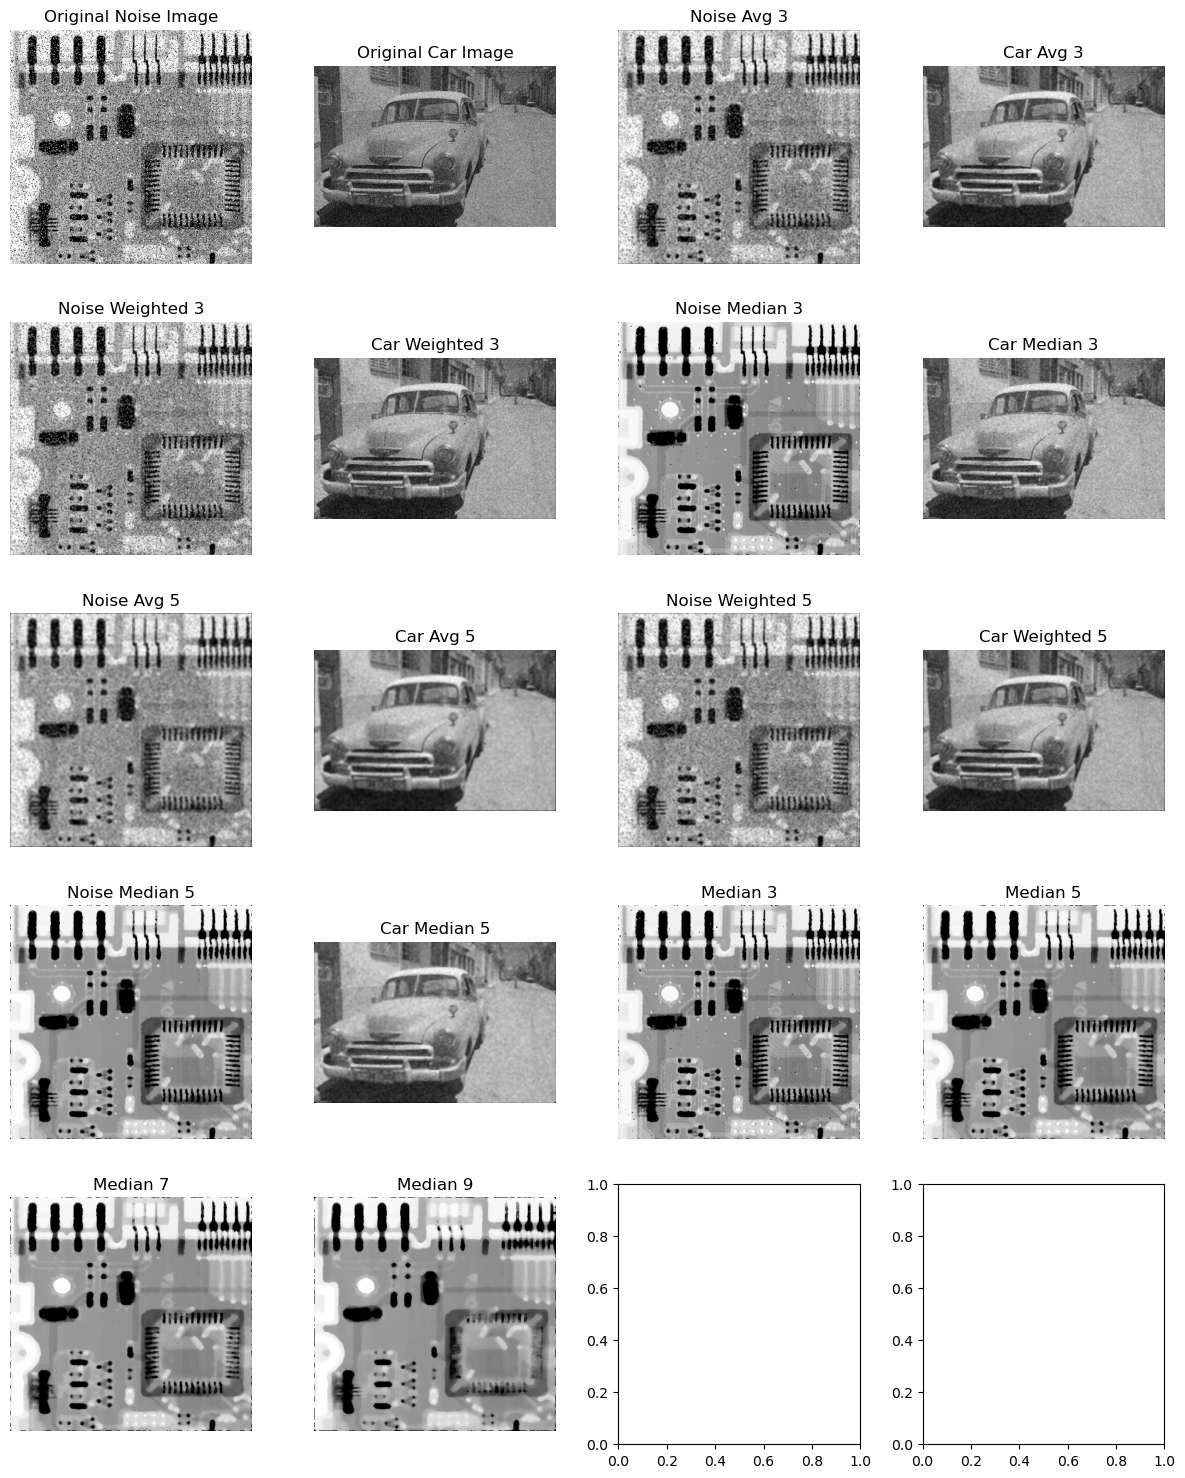

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply manual averaging filter (optimized with NumPy)
def fast_average_filter(image, kernel_size):
    pad = kernel_size // 2
    padded_img = np.pad(image, pad, mode="constant", constant_values=0)
    
    output = np.zeros_like(image, dtype=np.float32)
    
    for i in range(kernel_size):
        for j in range(kernel_size):
            output += padded_img[i:i+image.shape[0], j:j+image.shape[1]]
    
    return (output / (kernel_size * kernel_size)).astype(np.uint8)

# Function to apply manual weighted averaging filter (optimized)
def fast_weighted_average_filter(image, kernel_size):
    pad = kernel_size // 2
    padded_img = np.pad(image, pad, mode="constant", constant_values=0)
    
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
    kernel[pad, pad] = kernel_size * 2  # Higher weight at center
    kernel /= kernel.sum()  # Normalize
    
    output = np.zeros_like(image, dtype=np.float32)
    
    for i in range(kernel_size):
        for j in range(kernel_size):
            output += padded_img[i:i+image.shape[0], j:j+image.shape[1]] * kernel[i, j]
    
    return output.astype(np.uint8)

# Function to apply manual median filter (optimized using NumPy)
def fast_median_filter(image, kernel_size):
    pad = kernel_size // 2
    padded_img = np.pad(image, pad, mode="constant", constant_values=0)
    
    shape = (image.shape[0], image.shape[1], kernel_size, kernel_size)
    strides = padded_img.strides + padded_img.strides
    windows = np.lib.stride_tricks.as_strided(padded_img, shape=shape, strides=strides)
    
    return np.median(windows, axis=(2, 3)).astype(np.uint8)

# Load images (convert to grayscale for processing)
noise_img = cv2.imread("noise.tif", cv2.IMREAD_GRAYSCALE)
car_img = cv2.imread("car.png", cv2.IMREAD_GRAYSCALE)

# Ensure images are loaded
if noise_img is None or car_img is None:
    print("Error: One or both images not found! Check file paths.")
    exit()

# Define kernel sizes
kernel_sizes = [3, 5]

# Store results
filtered_images = {}

for size in kernel_sizes:
    filtered_images[f"Noise_Avg_{size}"] = fast_average_filter(noise_img, size)
    filtered_images[f"Car_Avg_{size}"] = fast_average_filter(car_img, size)

    filtered_images[f"Noise_Weighted_{size}"] = fast_weighted_average_filter(noise_img, size)
    filtered_images[f"Car_Weighted_{size}"] = fast_weighted_average_filter(car_img, size)

    filtered_images[f"Noise_Median_{size}"] = fast_median_filter(noise_img, size)
    filtered_images[f"Car_Median_{size}"] = fast_median_filter(car_img, size)

# Test different kernel sizes for optimal median filtering of noise.tiff
optimal_kernel_sizes = [3, 5, 7, 9]  # Try larger sizes to find the best
optimal_median_results = [fast_median_filter(noise_img, k) for k in optimal_kernel_sizes]

# Display results
fig, axes = plt.subplots(5, 4, figsize=(12, 15))
axes = axes.ravel()

# Show original images
axes[0].imshow(noise_img, cmap="gray")
axes[0].set_title("Original Noise Image")
axes[0].axis("off")

axes[1].imshow(car_img, cmap="gray")
axes[1].set_title("Original Car Image")
axes[1].axis("off")

# Show filtered images
i = 2
for key, img in filtered_images.items():
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(key.replace("_", " "))
    axes[i].axis("off")
    i += 1

# Show different median filter sizes on noise.tiff
for j in range(len(optimal_kernel_sizes)):
    axes[i].imshow(optimal_median_results[j], cmap="gray")
    axes[i].set_title(f"Median {optimal_kernel_sizes[j]}")
    axes[i].axis("off")
    i += 1

plt.tight_layout()
plt.show()
